In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob #sentiment analysis 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load the data
df = pd.read_csv('data/BA_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | We are extremely grateful ...
1,1,✅ Trip Verified | I had an appalling experie...
2,2,"Not Verified | Good points, the cabin crew, t..."
3,3,"Not Verified | It was a decent flight, reason..."
4,4,✅ Trip Verified | I really like flying Briti...


In [4]:
# Clean and preprocess
df['reviews'] = df['reviews'].str.strip()

# Create 'verified' column
df['verified'] = df['reviews'].apply(lambda x: 'Trip Verified' in x)

# Remove verification tags to clean up the reviews
df['cleaned_review'] = df['reviews'].str.replace(r"(✅\s*Trip Verified\s*\|?)|(Not Verified\s*\|?)", "", regex=True).str.strip()

In [5]:
df.head()

,Unnamed: 0,reviews,verified,cleaned_review
0,0,✅ Trip Verified | We are extremely grateful ...,True,We are extremely grateful to the crew of fligh...
1,1,✅ Trip Verified | I had an appalling experie...,True,I had an appalling experience with British Air...
2,2,"Not Verified | Good points, the cabin crew, t...",False,"Good points, the cabin crew, they were helpful..."
3,3,"Not Verified | It was a decent flight, reason...",False,"It was a decent flight, reasonable comfortable..."
4,4,✅ Trip Verified | I really like flying Briti...,True,I really like flying British Airways particula...


In [6]:
df.drop(columns=['Unnamed: 0', 'reviews'], inplace=True, errors='ignore')

In [7]:
df.head()

,verified,cleaned_review
0,True,We are extremely grateful to the crew of fligh...
1,True,I had an appalling experience with British Air...
2,False,"Good points, the cabin crew, they were helpful..."
3,False,"It was a decent flight, reasonable comfortable..."
4,True,I really like flying British Airways particula...


In [8]:
# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [9]:
df.head()

,verified,cleaned_review,sentiment,sentiment_label
0,True,We are extremely grateful to the crew of fligh...,0.058750,Positive
1,True,I had an appalling experience with British Air...,-0.056573,Negative
2,False,"Good points, the cabin crew, they were helpful...",0.048286,Positive
3,False,"It was a decent flight, reasonable comfortable...",0.143864,Positive
4,True,I really like flying British Airways particula...,0.248872,Positive


# --- Analysis & Visualization ---

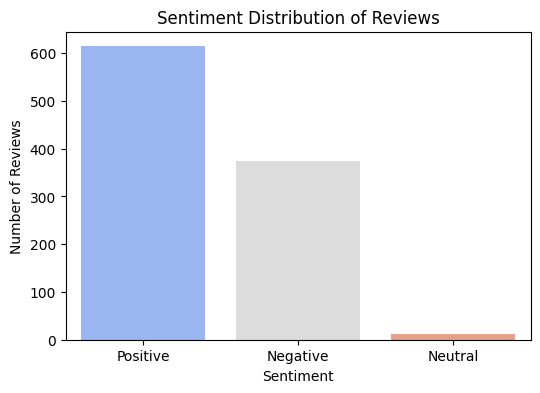

In [10]:
#  Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

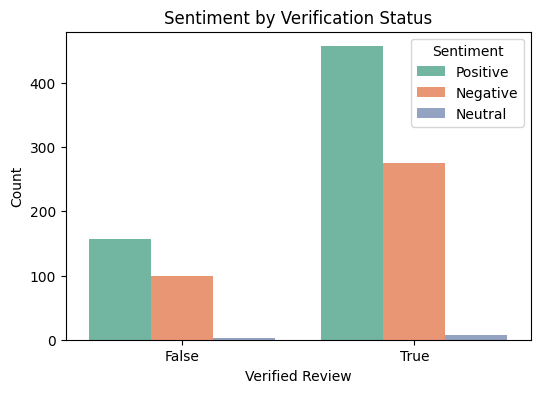

In [11]:
# Verified vs Sentiment
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='verified', hue='sentiment_label', palette='Set2')
plt.title('Sentiment by Verification Status')
plt.xlabel('Verified Review')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [12]:
# Word Cloud for All Reviews
text = ' '.join(df['cleaned_review'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

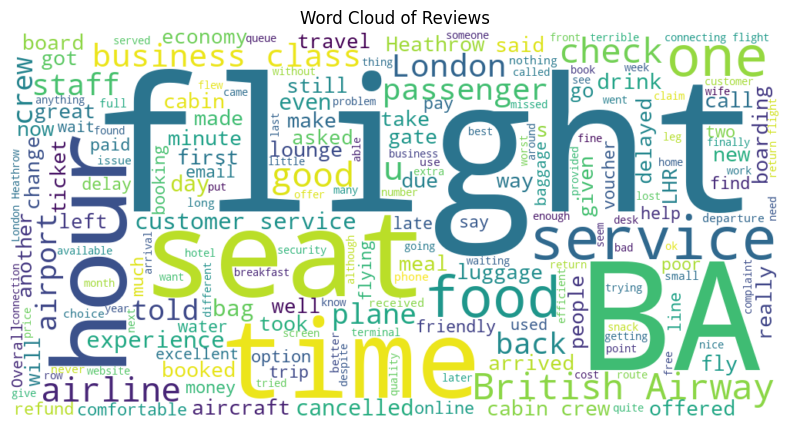

In [13]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# --- Insights ---

In [14]:
# Print insights
print("🔍 Insights:")
print(f"Total Reviews: {len(df)}")
print(f"Verified Reviews: {df['verified'].sum()} ({(df['verified'].mean()*100):.2f}%)")
print(f"Sentiment Breakdown:\n{df['sentiment_label'].value_counts()}")

🔍 Insights:
Total Reviews: 1000
Verified Reviews: 741 (74.10%)
Sentiment Breakdown:
sentiment_label
Positive    614
Negative    375
Neutral      11
Name: count, dtype: int64
